In [ ]:
# Description: The program uses the recurrent artificial neural network called Long Short Term Memory (LSTM)
            #  to predict the closing price of Google corporation.

In [ ]:
# To predict closing price of a stock with input of past 60 days stock price.

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from datetime import date

In [ ]:
#Load The Required Stock Data
startDate = pd.to_datetime('2012-01-01')
endDate = pd.to_datetime(date.today())
df = web.DataReader('GOOGL', data_source = 'stooq', start = startDate, end = endDate)
df = df.reindex(index = df.index[::-1])
print(df)

                Open     High       Low     Close     Volume
Date                                                        
2012-01-03   16.3100   16.704   16.3090   16.6350  147086000
2012-01-04   16.6310   16.756   16.5155   16.7070  114559200
2012-01-05   16.5530   16.599   16.4060   16.4750  131312640
2012-01-06   16.4960   16.500   16.2450   16.2505  107723960
2012-01-09   16.1625   16.175   15.5310   15.5615  232930720
...              ...      ...       ...       ...        ...
2023-07-10  118.3000  118.305  116.1350  116.4500   35315235
2023-07-11  116.2900  117.710  115.3500  117.1400   23078782
2023-07-12  118.8000  120.330  118.4145  118.9300   30404409
2023-07-13  120.9300  124.830  120.4500  124.5400   44297915
2023-07-14  124.8000  126.775  123.4900  125.4200   33283076

[2901 rows x 5 columns]


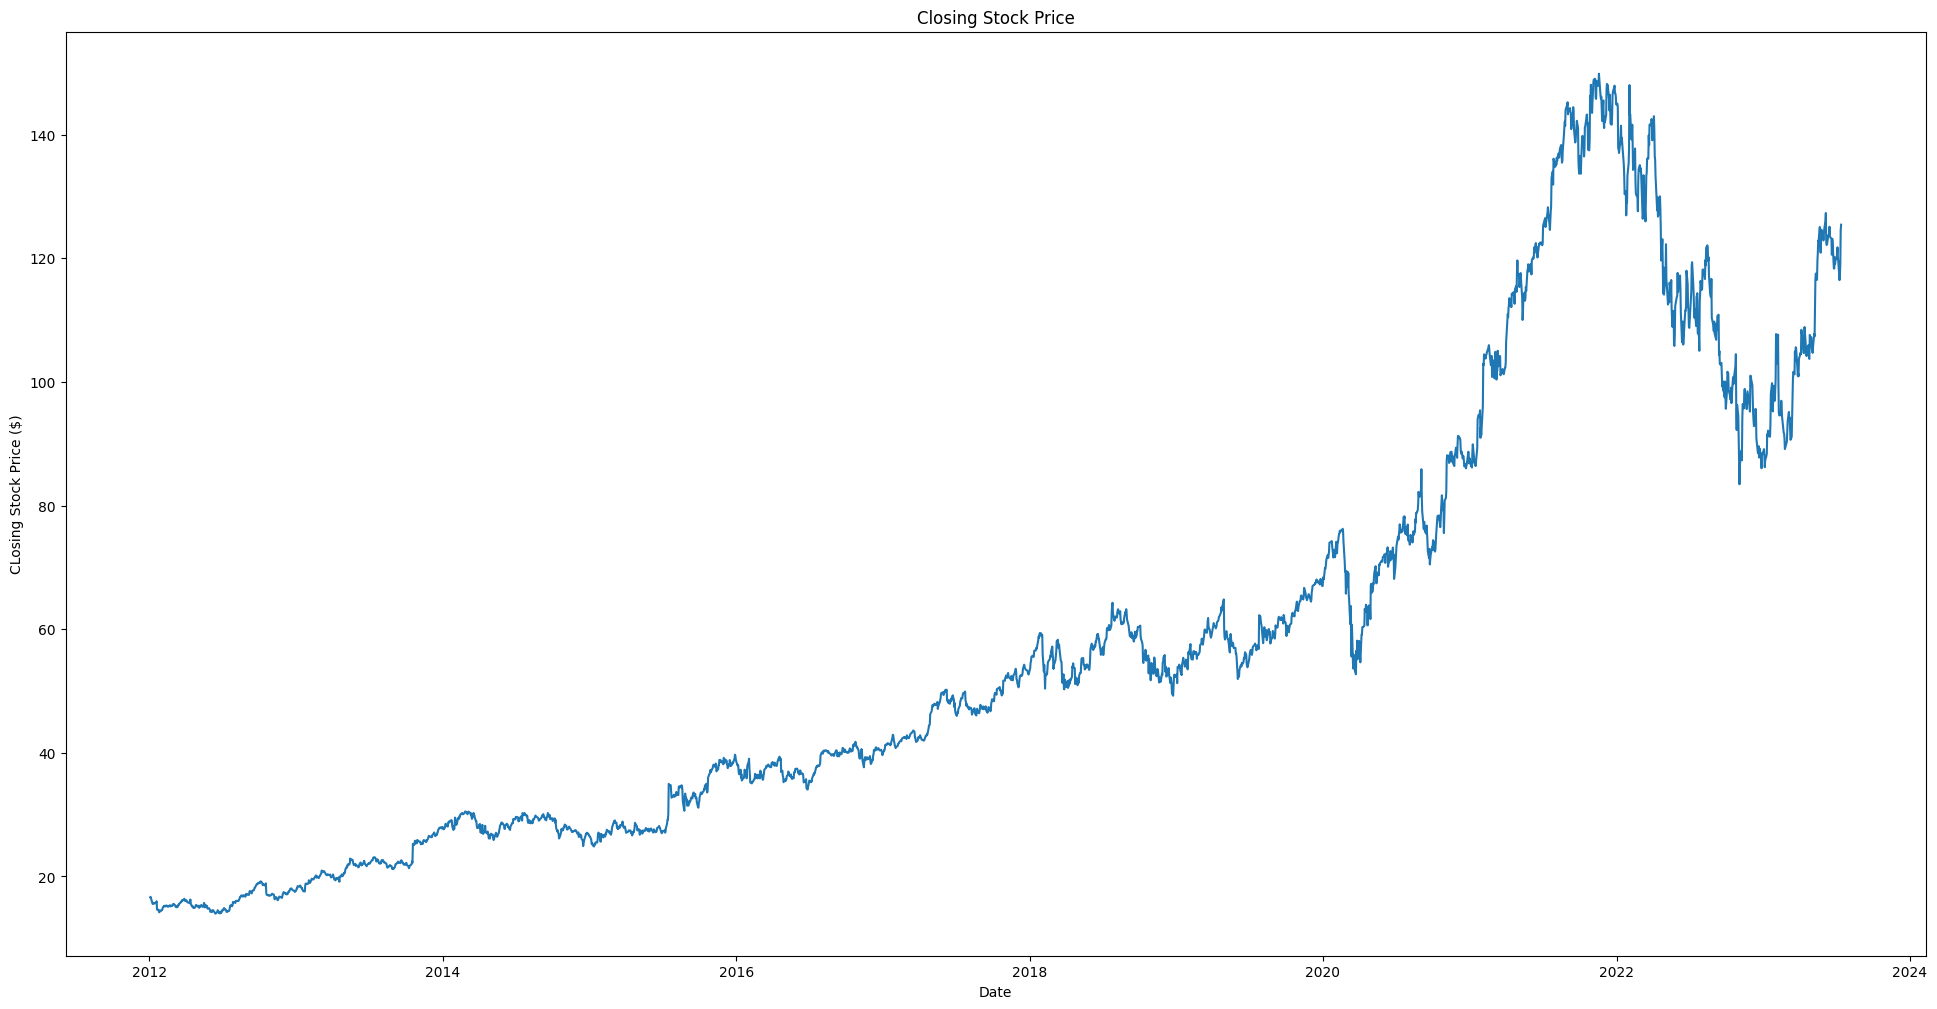

In [ ]:
#Visualize the Closing Stock Price History
plt.figure(figsize=(24,12))
plt.title("Closing Stock Price")
plt.plot(df['Close'])
plt.xlabel("Date")
plt.ylabel("CLosing Stock Price ($)")
plt.show()

In [ ]:
#Create A New DataFrame with only Close column
data = df.filter(['Close'])
#Convert DataFrame To Numpy Array
dataset = data.values

# Training -> 80% data
# Testing -> 20% data

training_data_len = math.ceil((len(dataset)) * 0.8)
print(training_data_len)

2321


In [ ]:
print(dataset)

[[ 16.635]
 [ 16.707]
 [ 16.475]
 ...
 [118.93 ]
 [124.54 ]
 [125.42 ]]


In [ ]:
#Scale The Data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

print(scaled_data)

[[0.01957133]
 [0.02010128]
 [0.01839366]
 ...
 [0.77250445]
 [0.81379635]
 [0.82027351]]


In [ ]:
#Create The Scaled Trained DataSet
train_data = scaled_data[0:training_data_len:]
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [ ]:
print(x_train[0])
print(y_train[0])

[0.01957133 0.02010128 0.01839366 0.01674125 0.01166993 0.01179506
 0.01231397 0.01299112 0.01213732 0.01279607 0.01359468 0.01482019
 0.00496092 0.00487259 0.00402614 0.00192107 0.00166713 0.00385317
 0.00343363 0.00387894 0.00401142 0.00479899 0.00686358 0.00920787
 0.00878097 0.00934772 0.00964582 0.0086264  0.00978198 0.009333
 0.00856016 0.00873681 0.00839087 0.0101132  0.0089981  0.0086632
 0.00935876 0.00924835 0.01092285 0.01089341 0.01165889 0.01144544
 0.01015737 0.00844975 0.00878833 0.00885089 0.00758122 0.00848655
 0.01080876 0.01048122 0.01142336 0.01214468 0.01378973 0.01369772
 0.01489379 0.01600889 0.0153759  0.01661613 0.01618922 0.01779747]
0.016443155554901293


In [ ]:
#Convert The x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)
#Resize The Arrays
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
unscaled_data = scaler.inverse_transform(dataset)
print(unscaled_data)

[[ 2274.04037 ]
 [ 2283.822434]
 [ 2252.30245 ]
 ...
 [16172.04366 ]
 [16934.22948 ]
 [17053.78804 ]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
# Build The Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1))) # Input Layer
model.add(LSTM(50, return_sequences = False)) # Long Term Memory Layer
model.add(Dense(25)) # Short Term Memory Layer
model.add(Dense(1)) # Forget Gate

In [ ]:
# Compile The Model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, batch_size = 100, epochs = 64)

Epoch 1/64
23/23 [==============================] - 5s 54ms/step - loss: 0.0200
Epoch 2/64
23/23 [==============================] - 1s 54ms/step - loss: 0.0013
Epoch 3/64
23/23 [==============================] - 2s 75ms/step - loss: 2.3270e-04
Epoch 4/64
23/23 [==============================] - 2s 73ms/step - loss: 1.8182e-04
Epoch 5/64
23/23 [==============================] - 1s 60ms/step - loss: 1.6698e-04
Epoch 6/64
23/23 [==============================] - 2s 82ms/step - loss: 1.6435e-04
Epoch 7/64
23/23 [==============================] - 2s 99ms/step - loss: 1.6308e-04
Epoch 8/64
23/23 [==============================] - 2s 69ms/step - loss: 1.6289e-04
Epoch 9/64
23/23 [==============================] - 1s 54ms/step - loss: 1.6000e-04
Epoch 10/64
23/23 [==============================] - 2s 77ms/step - loss: 1.6040e-04
Epoch 11/64
23/23 [==============================] - 1s 59ms/step - loss: 1.6107e-04
Epoch 12/64
23/23 [==============================] - 1s 55ms/step - loss: 1.5674e-

In [ ]:
# Create a Testing Dataset
test_data = scaled_data[training_data_len-60:,:]
x_test = []
y_test = dataset[training_data_len :, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
# Convert Data Into Numpy Array
x_test = np.array(x_test)
# Reshape The Data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Get The Model Predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean((predictions - y_test)**2))
print("Error % = ", rmse)
print("Accuracy % = ", (100-rmse))

19/19 [==============================] - 1s 13ms/step
Error % =  3.671743818799687
Accuracy % =  96.32825618120032


<ipython-input-45-c8af41b10fce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


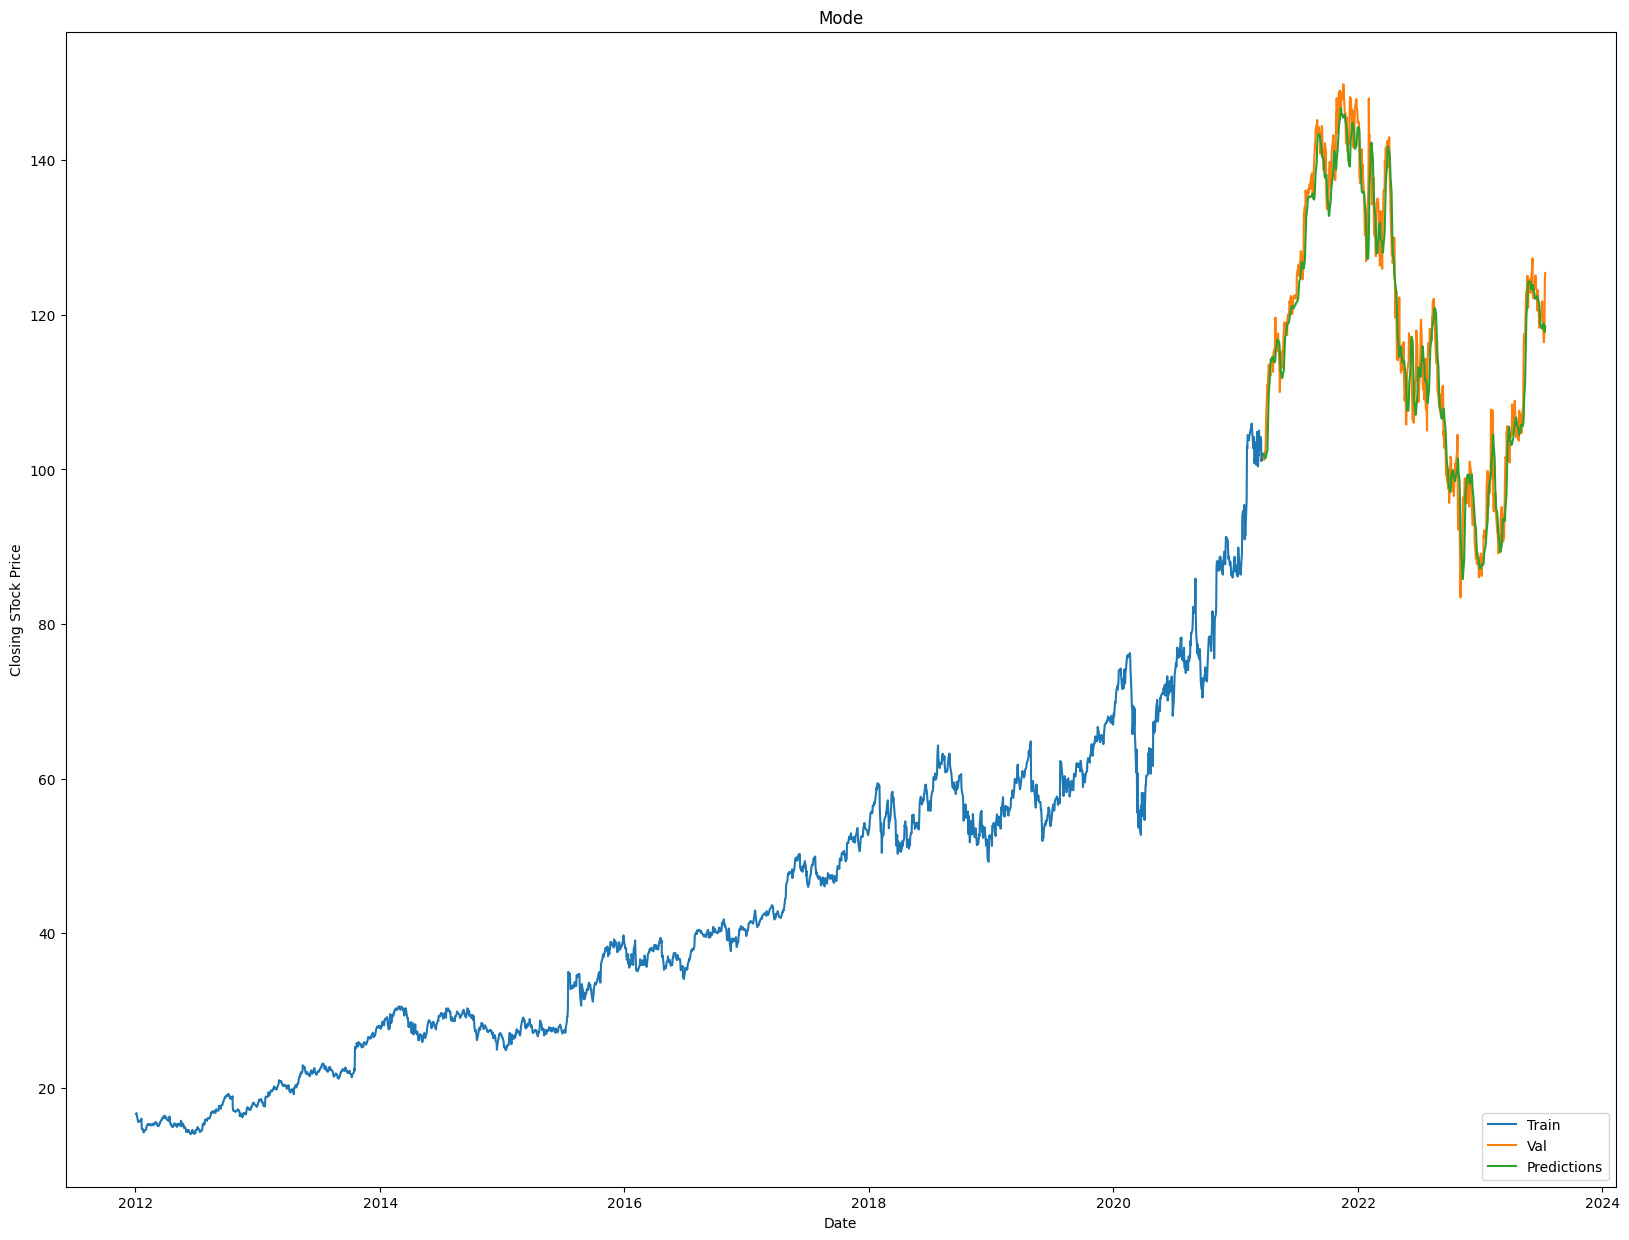

In [ ]:
# Plot The Data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(20,15))
plt.title("Mode")
plt.xlabel("Date")
plt.ylabel("Closing STock Price")
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [ ]:
# Use Model to Predict Future Price
Google_quote = web.DataReader('GOOGL', data_source = 'stooq', start = startDate, end = endDate)
new_df = Google_quote.filter(['Close'])
last_60_days = new_df[:60].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 19ms/step
[[105.07692]]
